In [87]:
#-----------------------------------------------#
#      Libraries used in this Project           #
#-----------------------------------------------#
import sys
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score

from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers


In [88]:
#--------------------------------#
#      Reading the dataset       #
#--------------------------------#
data = pd.read_csv('dataset.csv')  

In [89]:
#------------------------------------------#
# Just Checking the sample of the dataset  #
#------------------------------------------#
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
#---------------------------------------#
#  Printing the shape of the DataFrane  #
#---------------------------------------#
print('DataFrame: {}'.format(data.shape))
print(data.loc[1])

DataFrame: (303, 14)
age          37.0
sex           1.0
cp            2.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
slope         0.0
ca            0.0
thal          2.0
target        1.0
Name: 1, dtype: float64


In [91]:
#---------------------------------------------#
# Printing the last thirty or so data points  #
#---------------------------------------------#
data.loc[270:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0


In [92]:
#---------------------------------------------------------#
# Cleaning and Removing the missing data from the dataset #
#---------------------------------------------------------#
data1 = data[~data.isin(['?'])]
data1.loc[270:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0


In [93]:
#--------------------------------------------------#
# Dropping rows with NaN values from the DataFrame #
#--------------------------------------------------#
data = data.dropna(axis=0)
data.loc[270:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0


In [94]:
#-------------------------------------------------------#
# Printing the shape and the data type of the dataframe #
#-------------------------------------------------------#
print(data1.shape)
print(data1.dtypes)

(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [95]:
#----------------------------------------------------------#
#  Transforming data to numeric to enable further analysis #
#----------------------------------------------------------#
data1 = data.apply(pd.to_numeric)
data1.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [96]:
#---------------------------------------------------------------------------#
# Printing data characteristics, usings pandas built-in describe() function #
#---------------------------------------------------------------------------#
data1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


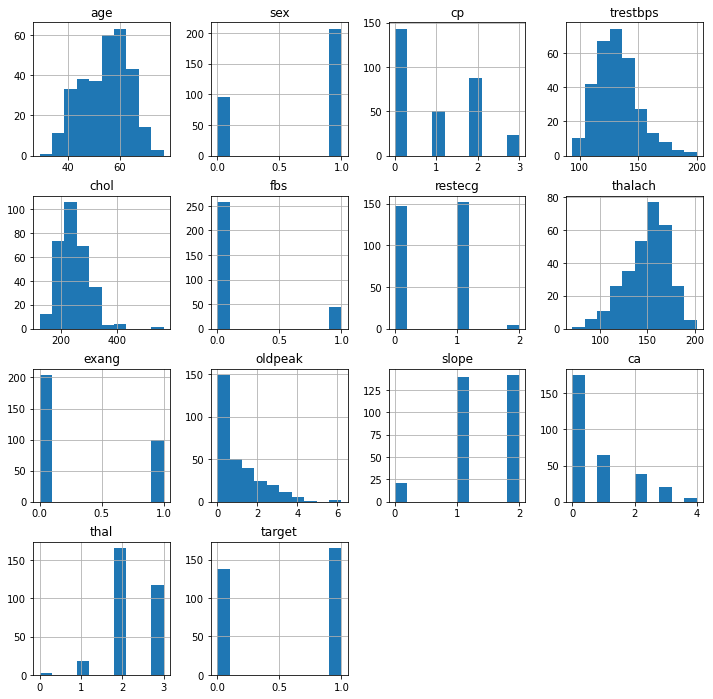

In [97]:
#---------------------------------------#
# Plotting histograms for each variable #
#---------------------------------------#
data1.hist(figsize = (12,12))
plt.show()

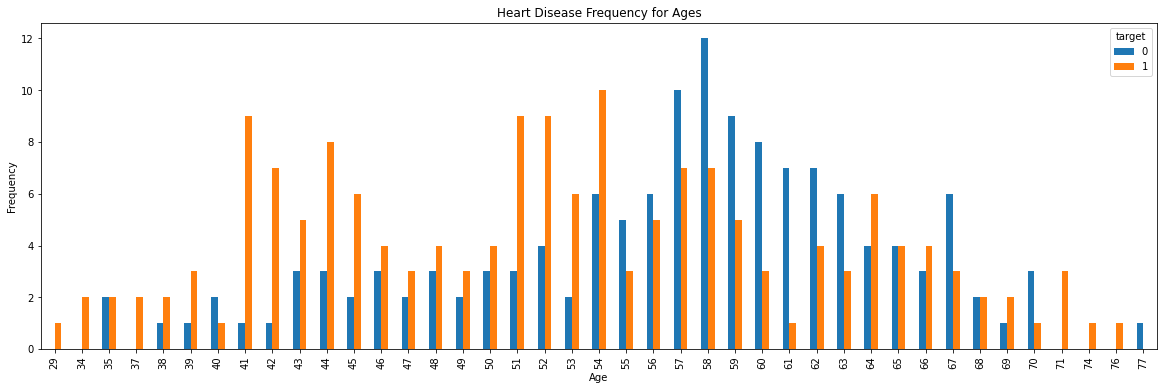

In [98]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


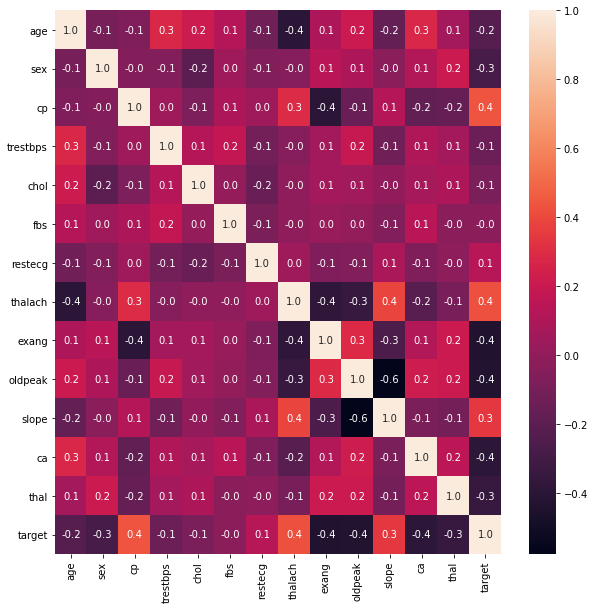

In [99]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

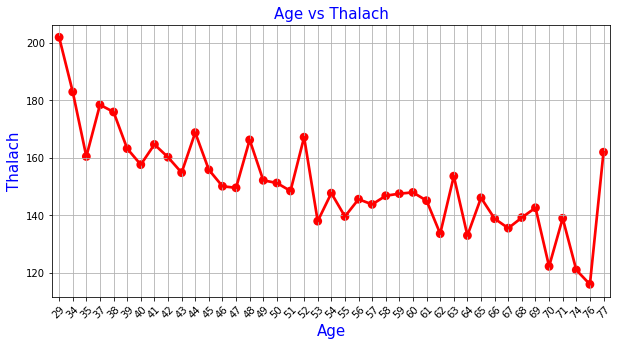

In [100]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [101]:
#--------------------------------------#
# Creating Trainig and testing Dataset #
#--------------------------------------#
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

In [102]:
X[0]

array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [103]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [104]:
X[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271])

In [105]:
#--------------------------------------#
# create X and Y datasets for training #
#--------------------------------------#
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [106]:
#---------------------------------------#
# convert the data to categorical labels#
#---------------------------------------#
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [107]:
X_train[0]

array([ 1.61392956, -1.46841752,  1.97312292,  0.47839125, -0.14038081,
       -0.41763453,  0.89896224,  0.05917329, -0.69663055,  0.65599028,
        0.97635214,  1.24459328, -0.51292188])

In [108]:
#------------------------------------------#
# Building and Training the Neural Network #
#------------------------------------------#

#---------------------------------------------#
#  define a function to build the keras model #
#---------------------------------------------#
def create_model():
    #---------------#
    #  create model #
    #---------------#
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    #----------------#
    #  compile model #
    #----------------#
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                224       
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_12 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 18        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


In [109]:
#------------------------------------# 
# fit the model to the training data #
#------------------------------------#
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)


Train on 242 samples, validate on 61 samples
Epoch 1/50
242/242 [==============================] - 1s 2ms/step - loss: 0.6788 - acc: 0.6777 - val_loss: 0.6685 - val_acc: 0.7869
Epoch 2/50
242/242 [==============================] - 0s 444us/step - loss: 0.6476 - acc: 0.7686 - val_loss: 0.6336 - val_acc: 0.7541
Epoch 3/50
242/242 [==============================] - 0s 493us/step - loss: 0.5921 - acc: 0.8058 - val_loss: 0.5895 - val_acc: 0.7541
Epoch 4/50
242/242 [==============================] - 0s 469us/step - loss: 0.5486 - acc: 0.8099 - val_loss: 0.5459 - val_acc: 0.7869
Epoch 5/50
242/242 [==============================] - 0s 516us/step - loss: 0.5041 - acc: 0.8512 - val_loss: 0.5034 - val_acc: 0.7869
Epoch 6/50
242/242 [==============================] - 0s 469us/step - loss: 0.4672 - acc: 0.8471 - val_loss: 0.4742 - val_acc: 0.8197
Epoch 7/50
242/242 [==============================] - 0s 493us/step - loss: 0.4605 - acc: 0.8512 - val_loss: 0.4507 - val_acc: 0.8197
Epoch 8/50
242/242 

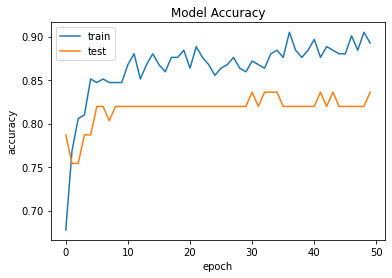

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
#-----------------#
#  Model accuracy #
#-----------------#
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

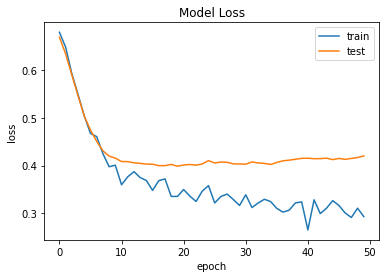

In [111]:
#--------------#
#  Model Losss #
#--------------#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [112]:
#---------------------------------------------------#
#  Improving Results through binary classification  #
#---------------------------------------------------#

#--------------------------------------------------------------------------------#
# convert into binary classification problem - heart disease or no heart disease #
#--------------------------------------------------------------------------------#
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1]


In [113]:
#----------------------------------------------------# 
# define a new keras model for binary classification #
#----------------------------------------------------#
def create_binary_model():
    #--------------# 
    # create model #
    #--------------#
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    #---------------# 
    # Compile model #
    #---------------#
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                224       
_________________________________________________________________
dropout_13 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_14 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [114]:
#-------------------------------------------# 
# fit the binary model on the training data #
#-------------------------------------------#
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Train on 242 samples, validate on 61 samples
Epoch 1/50
242/242 [==============================] - 1s 4ms/step - loss: 0.6827 - acc: 0.7149 - val_loss: 0.6794 - val_acc: 0.7869
Epoch 2/50
242/242 [==============================] - 0s 782us/step - loss: 0.6662 - acc: 0.7810 - val_loss: 0.6587 - val_acc: 0.7705
Epoch 3/50
242/242 [==============================] - 0s 868us/step - loss: 0.6336 - acc: 0.8264 - val_loss: 0.6267 - val_acc: 0.7869
Epoch 4/50
242/242 [==============================] - 0s 632us/step - loss: 0.5982 - acc: 0.8347 - val_loss: 0.5910 - val_acc: 0.7869
Epoch 5/50
242/242 [==============================] - 0s 803us/step - loss: 0.5430 - acc: 0.8512 - val_loss: 0.5526 - val_acc: 0.7869
Epoch 6/50
242/242 [==============================] - 0s 711us/step - loss: 0.5064 - acc: 0.8471 - val_loss: 0.5191 - val_acc: 0.7869
Epoch 7/50
242/242 [==============================] - 0s 639us/step - loss: 0.4810 - acc: 0.8430 - val_loss: 0.4903 - val_acc: 0.7869
Epoch 8/50
242/242 

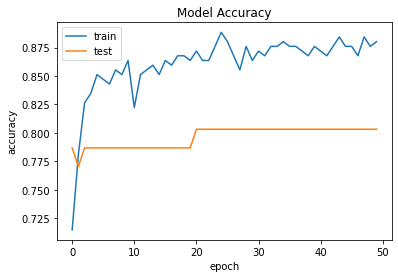

In [115]:
%matplotlib inline
#----------------# 
# Model accuracy #
#----------------#
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


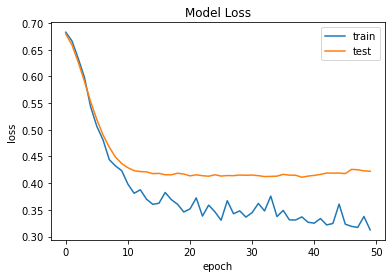

In [116]:
#--------------#
#  Model Losss #
#--------------#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [117]:
#--------------------#
# Results and Matrix #
#--------------------#

#------------------------------------------------------------------------#
# generate classification report using predictions for categorical model #
#------------------------------------------------------------------------#

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.8360655737704918
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61

